<a href="https://colab.research.google.com/github/lucassilvaalmeida/Mundo-de-Wumpus---PPCA/blob/main/Wumpus_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from typing_extensions import Self
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


class Mundo:
  def __init__(self, n):
    # Definir os atributos da minha classe mundo
    self.n = n# Tamanho da matriz mundo
    self.x = n # Tamanho x da matriz mundo
    self.y = n # Tamanho y da matriz mundo

    # Cada elememento presente na matriz mundo vai receber um número que o
    # Represente

    self.agente = 1
    self.wumpus = 10
    self.fedor = 8
    self.poco = 24
    self.brisa = 22
    self.ouro = -10
    self.brilho = -5

    # Criação da matriz mundo só com zeros
    self.matriz_mundo = np.zeros((self.n,self.n))

    # Criação das matrizes de sensores que vão compor o mundo
    # Fedor do Wumpus
    # Brilho do ouro
    # Brisa do Poço
    self.matriz_sensor_wumpus = np.zeros((self.n,self.n))

    self.matriz_sensor_ouro = np.zeros((self.n, self.n))

    self.matriz_sensor_poco = np.zeros((self.n, self.n))

    #Teste para garantir que não tenha elementos na posição 0,0
    teste = 1
    while(teste == 1):
      self.linha = random.sample(range(0, self.n), 3)
      self.coluna = random.sample(range(0, self.n), 3)
      if(self.linha[0] == 0 and self.coluna[0] == 0 or self.linha[1] == 0 and self.coluna[1] == 0 or self.linha[2] == 0 and self.coluna[2] == 0):
        teste = 1
      else:
        teste = 0

      # Essa parte do código, serve para conferir em qual parte do campo o seletor está, ou seja,
      # Como o campo tem 4 cantos, 4 lados e o meio, temos 9 posições possíveis
      # Elas são importante pois dependendo de cada posição as sensações serão preenchidas de forma diferente

  def criar_mundo(self,w=1):
    self.matriz_sensor_wumpus = np.zeros((self.n,self.n))
    self.matriz_sensor_ouro = np.zeros((self.n, self.n))
    self.matriz_sensor_poco = np.zeros((self.n, self.n))
    self.matriz_mundo = np.zeros((self.n,self.n))

    if(w == 1):
      place = 0
      pos_x = self.linha[0]
      pos_y = self.coluna[0]
      limite_x = self.n - 1
      limite_y = self.n - 1

      if(pos_x == 0 and pos_y == 0):
        place = 1 #Canto superior esquerdo
      elif(pos_x == 0 and pos_y == limite_y):
        place = 2 #Canto superior direito
      elif(pos_x == limite_x and pos_y == limite_y):
        place = 3 #Canto inferior direito
      elif(pos_x == limite_x and pos_y == 0):
        place = 4 #Canto inferior esquerdo
      elif(pos_y > 0 and pos_y < limite_y and pos_x == 0):
        place = 5 # Borda superior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == limite_y):
        place = 6 # Borda direita
      elif(pos_y > 0 and pos_y < limite_y and pos_x == limite_x):
        place = 7 # Borda inferior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == 0):
        place = 8 # Borda esquerda
      else:
        place = 0 # meio do tabuleiro

      x = pos_x
      y = pos_y
      sensor = self.fedor

      if(place == 1):
        self.matriz_sensor_wumpus[x+1][y] = sensor
        self.matriz_sensor_wumpus[x][y+1] = sensor
      elif(place == 2):
        self.matriz_sensor_wumpus[x+1][y] = sensor
        self.matriz_sensor_wumpus[x][y-1] = sensor
      elif(place == 3):
        self.matriz_sensor_wumpus[x-1][y] = sensor
        self.matriz_sensor_wumpus[x][y-1] = sensor
      elif(place == 4):
        self.matriz_sensor_wumpus[x-1][y] = sensor
        self.matriz_sensor_wumpus[x][y+1] = sensor
      elif(place == 5):
        self.matriz_sensor_wumpus[x+1][y] = sensor
        self.matriz_sensor_wumpus[x][y+1] = sensor
        self.matriz_sensor_wumpus[x][y-1] = sensor
      elif(place == 6):
        self.matriz_sensor_wumpus[x+1][y] = sensor
        self.matriz_sensor_wumpus[x-1][y] = sensor
        self.matriz_sensor_wumpus[x][y-1] = sensor
      elif(place == 7):
        self.matriz_sensor_wumpus[x-1][y] = sensor
        self.matriz_sensor_wumpus[x][y+1] = sensor
        self.matriz_sensor_wumpus[x][y-1] = sensor
      elif(place == 8):
        self.matriz_sensor_wumpus[x+1][y] = sensor
        self.matriz_sensor_wumpus[x-1][y] = sensor
        self.matriz_sensor_wumpus[x][y+1] = sensor
      elif(place == 0):
        self.matriz_sensor_wumpus[x+1][y] = sensor
        self.matriz_sensor_wumpus[x-1][y] = sensor
        self.matriz_sensor_wumpus[x][y+1] = sensor
        self.matriz_sensor_wumpus[x][y-1] = sensor

###############################################################################

      place = 0
      pos_x = self.linha[1]
      pos_y = self.coluna[1]
      limite_x = self.n - 1
      limite_y = self.n - 1

      if(pos_x == 0 and pos_y == 0):
        place = 1 #Canto superior esquerdo
      elif(pos_x == 0 and pos_y == limite_y):
        place = 2 #Canto superior direito
      elif(pos_x == limite_x and pos_y == limite_y):
        place = 3 #Canto inferior direito
      elif(pos_x == limite_x and pos_y == 0):
        place = 4 #Canto inferior esquerdo
      elif(pos_y > 0 and pos_y < limite_y and pos_x == 0):
        place = 5 # Borda superior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == limite_y):
        place = 6 # Borda direita
      elif(pos_y > 0 and pos_y < limite_y and pos_x == limite_x):
        place = 7 # Borda inferior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == 0):
        place = 8 # Borda esquerda
      else:
        place = 0 # meio do tabuleiro

      x = pos_x
      y = pos_y
      sensor = self.brilho

      if(place == 1):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
      elif(place == 2):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 3):
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 4):
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_wumpus[x][y+1] = sensor
      elif(place == 5):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 6):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 7):
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 8):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
      elif(place == 0):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor

###############################################################################


      place = 0
      pos_x = self.linha[2]
      pos_y = self.coluna[2]
      limite_x = self.n - 1
      limite_y = self.n - 1

      if(pos_x == 0 and pos_y == 0):
        place = 1 #Canto superior esquerdo
      elif(pos_x == 0 and pos_y == limite_y):
        place = 2 #Canto superior direito
      elif(pos_x == limite_x and pos_y == limite_y):
        place = 3 #Canto inferior direito
      elif(pos_x == limite_x and pos_y == 0):
        place = 4 #Canto inferior esquerdo
      elif(pos_y > 0 and pos_y < limite_y and pos_x == 0):
        place = 5 # Borda superior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == limite_y):
        place = 6 # Borda direita
      elif(pos_y > 0 and pos_y < limite_y and pos_x == limite_x):
        place = 7 # Borda inferior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == 0):
        place = 8 # Borda esquerda
      else:
        place = 0 # meio do tabuleiro

      x = pos_x
      y = pos_y
      sensor = self.brisa

      if(place == 1):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
      elif(place == 2):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor
      elif(place == 3):
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor
      elif(place == 4):
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
      elif(place == 5):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor
      elif(place == 6):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor
      elif(place == 7):
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 8):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
      elif(place == 0):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor

      #Junta cada matriz de sensores com a matriz do mundo
      self.matriz_mundo = self.matriz_mundo + self.matriz_sensor_wumpus + self.matriz_sensor_ouro + self.matriz_sensor_poco

      # Preenche a matriz com o elementos para posições aleatórias
      self.matriz_mundo[self.linha[0]][self.coluna[0]] = self.wumpus
      self.matriz_mundo[self.linha[1]][self.coluna[1]] = self.ouro
      self.matriz_mundo[self.linha[2]][self.coluna[2]] = self.poco

    elif(w == 0):
      place = 0
      pos_x = self.linha[1]
      pos_y = self.coluna[1]
      limite_x = self.n - 1
      limite_y = self.n - 1

      if(pos_x == 0 and pos_y == 0):
        place = 1 #Canto superior esquerdo
      elif(pos_x == 0 and pos_y == limite_y):
        place = 2 #Canto superior direito
      elif(pos_x == limite_x and pos_y == limite_y):
        place = 3 #Canto inferior direito
      elif(pos_x == limite_x and pos_y == 0):
        place = 4 #Canto inferior esquerdo
      elif(pos_y > 0 and pos_y < limite_y and pos_x == 0):
        place = 5 # Borda superior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == limite_y):
        place = 6 # Borda direita
      elif(pos_y > 0 and pos_y < limite_y and pos_x == limite_x):
        place = 7 # Borda inferior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == 0):
        place = 8 # Borda esquerda
      else:
        place = 0 # meio do tabuleiro

      x = pos_x
      y = pos_y
      sensor = self.brilho

      if(place == 1):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
      elif(place == 2):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 3):
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 4):
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_wumpus[x][y+1] = sensor
      elif(place == 5):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 6):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 7):
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 8):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
      elif(place == 0):
        self.matriz_sensor_ouro[x+1][y] = sensor
        self.matriz_sensor_ouro[x-1][y] = sensor
        self.matriz_sensor_ouro[x][y+1] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor

###############################################################################


      place = 0
      pos_x = self.linha[2]
      pos_y = self.coluna[2]
      limite_x = self.n - 1
      limite_y = self.n - 1

      if(pos_x == 0 and pos_y == 0):
        place = 1 #Canto superior esquerdo
      elif(pos_x == 0 and pos_y == limite_y):
        place = 2 #Canto superior direito
      elif(pos_x == limite_x and pos_y == limite_y):
        place = 3 #Canto inferior direito
      elif(pos_x == limite_x and pos_y == 0):
        place = 4 #Canto inferior esquerdo
      elif(pos_y > 0 and pos_y < limite_y and pos_x == 0):
        place = 5 # Borda superior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == limite_y):
        place = 6 # Borda direita
      elif(pos_y > 0 and pos_y < limite_y and pos_x == limite_x):
        place = 7 # Borda inferior
      elif(pos_x > 0 and pos_x < limite_x and pos_y == 0):
        place = 8 # Borda esquerda
      else:
        place = 0 # meio do tabuleiro

      x = pos_x
      y = pos_y
      sensor = self.brisa

      if(place == 1):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
      elif(place == 2):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor
      elif(place == 3):
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor
      elif(place == 4):
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
      elif(place == 5):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor
      elif(place == 6):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor
      elif(place == 7):
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
        self.matriz_sensor_ouro[x][y-1] = sensor
      elif(place == 8):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
      elif(place == 0):
        self.matriz_sensor_poco[x+1][y] = sensor
        self.matriz_sensor_poco[x-1][y] = sensor
        self.matriz_sensor_poco[x][y+1] = sensor
        self.matriz_sensor_poco[x][y-1] = sensor

      #Junta cada matriz de sensores com a matriz do mundo
      self.matriz_mundo = self.matriz_mundo + self.matriz_sensor_ouro + self.matriz_sensor_poco

      # Preenche a matriz com o elementos para posições aleatórias
      self.matriz_mundo[self.linha[1]][self.coluna[1]] = self.ouro
      self.matriz_mundo[self.linha[2]][self.coluna[2]] = self.poco

###############################################################################

  # Esse método informa o tamanho do mundo
  def tamanho(self):
    print(f'O tamanho do mundo é {self.n}',"x",self.n)

  # Esse método apresenta o mundo
  def apresentar(self):
    sns.heatmap(self.matriz_mundo, annot=True, cmap='coolwarm',cbar=False)
    plt.axis('off')
    plt.axis('off')
    plt.show()

  # Esse método retorna o mundo
  def get_matriz_mundo(self):
    return self.matriz_mundo


### Criação da Classe Agente1

In [93]:
class Agente1:
    def __init__(self,matriz):
      self.n = len(matriz)
      self.matriz_mundo = matriz
      self.x = 0
      self.y = 0
      self.agente = 1
      self.wumpus = 10
      self.fedor = 8
      self.poco = 24
      self.brisa = 22
      self.ouro = -10
      self.brilho = -5
      self.history_x = [0]
      self.history_y = [0]
      self.flecha = 1

      self.matriz_agente = np.zeros((self.n,self.n))
      self.matriz_sentir = np.zeros((self.n,self.n))
      self.matriz_agente_historico = np.zeros((self.n,self.n))
      self.matriz_agente_historico[self.x][self.y] = self.agente
      self.matriz_agente[self.x][self.y] = self.agente

    # Apresenta onde o agente está no mundo
    def apresentar(self):
      sns.heatmap(self.matriz_agente, annot=True, cmap='coolwarm',cbar=False)
      plt.axis('off')
      plt.axis('off')
      plt.show()

    # Faz com que o agente ande pelo mundo
    def andar(self,d):
      x,y = self.pos_atual()

      if(d == 1): # Andar para Cima
        self.matriz_agente[x-1][y] = self.agente
        self.matriz_agente[x][y] = 0
        x1 = x-1
        y1 = y

      elif(d == 2): #Andar para direita
        self.matriz_agente[x][y+1] = self.agente
        self.matriz_agente[x][y] = 0
        x1 = x
        y1 = y+1

      elif(d == 3): # Andar para baixo
        self.matriz_agente[x+1][y] = self.agente
        self.matriz_agente[x][y] = 0
        x1 = x+1
        y1 = y

      elif(d == 4): #Andar para esquerda
        self.matriz_agente[x][y-1] = self.agente
        self.matriz_agente[x][y] = 0
        x1 = x
        y1 = y-1

      elif(d == 0):
        x1 = x
        y1 = y
        self.matriz_agente[x][y] = 1

      self.history_x.append(x1)
      self.history_y.append(y1)
      self.matriz_agente_historico = self.matriz_agente + self.matriz_agente_historico

    # Retorna a posição atual do agente
    def pos_atual(self):
      pos_x = self.history_x[len(self.history_x)-1]
      pos_y = self.history_y[len(self.history_y)-1]
      return pos_x,pos_y

    # Retortar em qual dos 9 lugares possíveis o agente pode estar
    def lugar(self):
      place = 0
      x,y = self.pos_atual()
      if(x == 0 and y == 0):
        place = 1
      elif(x == 0 and y == self.n-1):
        place = 2
      elif(x == self.n-1 and y == self.n-1):
        place = 3
      elif(x == self.n-1 and y == 0):
        place = 4
      elif(y > 0 and y < self.n-1 and x == 0):
        place = 5
      elif(x > 0 and x < self.n-1 and y == self.n-1):
        place = 6
      elif(y > 0 and y < self.n-1 and x == self.n-1):
        place = 7
      elif(x > 0 and x < self.n-1 and y == 0):
        place = 8
      else:
        place = 0
      return place

    # Retorna a senção da posição atual do agente
    def sentir(self):
      x,y = self.pos_atual()
      sentido = self.matriz_mundo[x][y]
      return sentido

    # Esse método cria uma matriz de percepção do agente a partir de sua posição atual
    def percepcao(self):
      place = self.lugar()
      sentido = self.sentir()
      valor = 0
      x,y = self.pos_atual()
      x1 = self.history_x[len(self.history_x)-2]
      y1 = self.history_y[len(self.history_y)-2]

###############################################################################

      if(place == 1 and sentido == self.fedor):
        self.matriz_sentir[x][y+1] = self.wumpus
        self.matriz_sentir[x+1][y] = self.wumpus

      elif(place == 1 and sentido == self.brilho):
        self.matriz_sentir[x+1][y] = self.ouro
        self.matriz_sentir[x][y+1] = self.ouro

      elif(place == 1 and sentido == self.brisa):
        self.matriz_sentir[x+1][y] = self.poco
        self.matriz_sentir[x][y+1] = self.poco

      elif(place == 1 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x+1][y] = self.poco + self.wumpus
        self.matriz_sentir[x][y+1] = self.poco + self.wumpus

      elif(place == 1 and sentido == 3):
        self.matriz_sentir[x+1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x][y+1] = self.ouro + self.wumpus

      elif(place == 1 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x+1][y] = self.poco + self.ouro
        self.matriz_sentir[x][y+1] = self.poco + self.ouro

###############################################################################
      if(place == 2 and sentido == self.fedor):
        self.matriz_sentir[x][y-1] = self.wumpus
        self.matriz_sentir[x+1][y] = self.wumpus


      elif(place == 2 and sentido == self.brilho):
        self.matriz_sentir[x+1][y] = self.ouro
        self.matriz_sentir[x][y-1] = self.ouro

      elif(place == 2 and sentido == self.brisa):
        self.matriz_sentir[x+1][y] = self.poco
        self.matriz_sentir[x][y-1] = self.poco

      elif(place == 2 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x+1][y] = self.poco + self.wumpus
        self.matriz_sentir[x][y-1] = self.poco + self.wumpus

      elif(place == 2 and sentido == 3):
        self.matriz_sentir[x+1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x][y-1] = self.ouro + self.wumpus

      elif(place == 2 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x+1][y] = self.poco + self.ouro
        self.matriz_sentir[x][y-1] = self.poco + self.ouro

  ###############################################################################
      if(place == 3 and sentido == self.fedor):
        self.matriz_sentir[x][y-1] = self.wumpus
        self.matriz_sentir[x-1][y] = self.wumpus

      elif(place == 3 and sentido == self.brilho):
        self.matriz_sentir[x-1][y] = self.ouro
        self.matriz_sentir[x][y-1] = self.ouro

      elif(place == 3 and sentido == self.brisa):
        self.matriz_sentir[x-1][y] = self.poco
        self.matriz_sentir[x][y-1] = self.poco

      elif(place == 3 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x-1][y] = self.poco + self.wumpus
        self.matriz_sentir[x][y-1] = self.poco + self.wumpus

      elif(place == 3 and sentido == 3):
        self.matriz_sentir[x-1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x][y-1] = self.ouro + self.wumpus

      elif(place == 3 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x-1][y] = self.poco + self.ouro
        self.matriz_sentir[x][y-1] = self.poco + self.ouro

  ###############################################################################
      if(place == 4 and sentido == self.fedor):
        self.matriz_sentir[x][y+1] = self.wumpus
        self.matriz_sentir[x-1][y] = self.wumpus

      elif(place == 4 and sentido == self.brilho):
        self.matriz_sentir[x-1][y] = self.ouro
        self.matriz_sentir[x][y+1] = self.ouro

      elif(place == 4 and sentido == self.brisa):
        self.matriz_sentir[x-1][y] = self.poco
        self.matriz_sentir[x][y+1] = self.poco

      elif(place == 4 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x-1][y] = self.poco + self.wumpus
        self.matriz_sentir[x][y+1] = self.poco + self.wumpus

      elif(place == 4 and sentido == 3):
        self.matriz_sentir[x-1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x][y+1] = self.ouro + self.wumpus

      elif(place == 4 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x-1][y] = self.poco + self.ouro
        self.matriz_sentir[x][y+1] = self.poco + self.ouro

###############################################################################
      if(place == 5 and sentido == self.fedor):
        self.matriz_sentir[x][y+1] = self.wumpus
        self.matriz_sentir[x][y-1] = self.wumpus
        self.matriz_sentir[x+1][y] = self.wumpus
        self.matriz_sentir[x1][y1] = 0

      elif(place == 5 and sentido == self.brilho):
        self.matriz_sentir[x][y+1] = self.ouro
        self.matriz_sentir[x][y-1] = self.ouro
        self.matriz_sentir[x+1][y] = self.ouro

      elif(place == 5 and sentido == self.brisa):
        self.matriz_sentir[x][y+1] = self.poco
        self.matriz_sentir[x][y-1] = self.poco
        self.matriz_sentir[x+1][y] = self.poco

      elif(place == 5 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x][y-1] = self.poco + self.wumpus
        self.matriz_sentir[x][y+1] = self.poco + self.wumpus
        self.matriz_sentir[x+1][y] = self.poco + self.wumpus

      elif(place == 5 and sentido == 3):
        self.matriz_sentir[x][y+1] = self.ouro + self.wumpus
        self.matriz_sentir[x][y-1] = self.ouro + self.wumpus
        self.matriz_sentir[x+1][y] = self.ouro + self.wumpus

      elif(place == 5 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x][y+1] = self.poco + self.ouro
        self.matriz_sentir[x][y-1] = self.poco + self.ouro
        self.matriz_sentir[x+1][y] = self.poco + self.ouro
        self.matriz_sentir[x1][y1] = 0

###############################################################################
      if(place == 6 and sentido == self.fedor):
        self.matriz_sentir[x-1][y] = self.wumpus
        self.matriz_sentir[x][y-1] = self.wumpus
        self.matriz_sentir[x+1][y] = self.wumpus

      elif(place == 6 and sentido == self.brilho):
        self.matriz_sentir[x-1][y] = self.ouro
        self.matriz_sentir[x][y-1] = self.ouro
        self.matriz_sentir[x+1][y] = self.ouro

      elif(place == 6 and sentido == self.brisa):
        self.matriz_sentir[x-1][y] = self.poco
        self.matriz_sentir[x][y-1] = self.poco
        self.matriz_sentir[x+1][y] = self.poco

      elif(place == 6 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x-1][y] = self.poco + self.wumpus
        self.matriz_sentir[x][y-1] = self.poco + self.wumpus
        self.matriz_sentir[x+1][y] = self.poco + self.wumpus

      elif(place == 6 and sentido == 3):
        self.matriz_sentir[x-1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x][y-1] = self.ouro + self.wumpus
        self.matriz_sentir[x+1][y] = self.ouro + self.wumpus

      elif(place == 6 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x-1][y] = self.poco + self.ouro
        self.matriz_sentir[x][y-1] = self.poco + self.ouro
        self.matriz_sentir[x+1][y] = self.poco + self.ouro

###############################################################################
      if(place == 7 and sentido == self.fedor):
        self.matriz_sentir[x][y+1] = self.wumpus
        self.matriz_sentir[x][y-1] = self.wumpus
        self.matriz_sentir[x-1][y] = self.wumpus

      elif(place == 7 and sentido == self.brilho):
        self.matriz_sentir[x-1][y] = self.ouro
        self.matriz_sentir[x][y-1] = self.ouro
        self.matriz_sentir[x][y+1] = self.ouro

      elif(place == 7 and sentido == self.brisa):
        self.matriz_sentir[x-1][y] = self.poco
        self.matriz_sentir[x][y-1] = self.poco
        self.matriz_sentir[x][y+1] = self.poco

      elif(place == 7 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x-1][y] = self.poco + self.wumpus
        self.matriz_sentir[x][y-1] = self.poco + self.wumpus
        self.matriz_sentir[x][y+1] = self.poco + self.wumpus

      elif(place == 7 and sentido == 3):
        self.matriz_sentir[x-1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x][y-1] = self.ouro + self.wumpus
        self.matriz_sentir[x][y+1] = self.ouro + self.wumpus

      elif(place == 7 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x-1][y] = self.poco + self.ouro
        self.matriz_sentir[x][y-1] = self.poco + self.ouro
        self.matriz_sentir[x][y+1] = self.poco + self.ouro

###############################################################################
      if(place == 8 and sentido == self.fedor):
        self.matriz_sentir[x][y+1] = self.wumpus
        self.matriz_sentir[x-1][y] = self.wumpus
        self.matriz_sentir[x+1][y] = self.wumpus

      elif(place == 8 and sentido == self.brilho):
        self.matriz_sentir[x+1][y] = self.ouro
        self.matriz_sentir[x-1][y] = self.ouro
        self.matriz_sentir[x][y+1] = self.ouro

      elif(place == 8 and sentido == self.brisa):
        self.matriz_sentir[x+1][y] = self.poco
        self.matriz_sentir[x-1][y] = self.poco
        self.matriz_sentir[x][y+1] = self.poco

      elif(place == 8 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x+1][y] = self.poco + self.wumpus
        self.matriz_sentir[x-1][y] = self.poco + self.wumpus
        self.matriz_sentir[x-1][y] = self.poco + self.wumpus

      elif(place == 8 and sentido == 3):
        self.matriz_sentir[x+1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x-1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x][y+1] = self.ouro + self.wumpus

      elif(place == 8 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x+1][y] = self.poco + self.ouro
        self.matriz_sentir[x-1][y] = self.poco + self.ouro
        self.matriz_sentir[x][y+1] = self.poco + self.ouro

#########################################################################
      if(place == 0 and sentido == self.fedor):
        self.matriz_sentir[x][y+1] = self.wumpus
        self.matriz_sentir[x][y-1] = self.wumpus
        self.matriz_sentir[x+1][y] = self.wumpus
        self.matriz_sentir[x-1][y] = self.wumpus

      elif(place == 0 and sentido == self.brilho):
        self.matriz_sentir[x+1][y] = self.ouro
        self.matriz_sentir[x][y-1] = self.ouro
        self.matriz_sentir[x][y+1] = self.ouro
        self.matriz_sentir[x-1][y] = self.ouro

      elif(place == 0 and sentido == self.brisa):
        self.matriz_sentir[x+1][y] = self.poco
        self.matriz_sentir[x][y-1] = self.poco
        self.matriz_sentir[x][y+1] = self.poco
        self.matriz_sentir[x-1][y] = self.poco

      elif(place == 0 and sentido == self.fedor + self.brisa):
        self.matriz_sentir[x+1][y] = self.poco + self.wumpus
        self.matriz_sentir[x][y-1] = self.poco + self.wumpus
        self.matriz_sentir[x][y+1] = self.poco + self.wumpus
        self.matriz_sentir[x-1][y] = self.poco + self.wumpus

      elif(place == 0 and sentido == 3):
        self.matriz_sentir[x+1][y] = self.ouro + self.wumpus
        self.matriz_sentir[x][y-1] = self.ouro + self.wumpus
        self.matriz_sentir[x][y+1] = self.ouro + self.wumpus
        self.matriz_sentir[x-1][y] = self.ouro + self.wumpus

      elif(place == 0 and sentido == self.brilho + self.brisa):
        self.matriz_sentir[x+1][y] = self.poco + self.ouro
        self.matriz_sentir[x][y-1] = self.poco + self.ouro
        self.matriz_sentir[x][y+1] = self.poco + self.ouro
        self.matriz_sentir[x-1][y] = self.poco + self.ouro

#########################################################################
      if(sentido == self.ouro):
        self.matriz_sentir[x][y] = self.ouro

      elif(sentido == self.poco):
        self.matriz_sentir[x][y] = self.poco

      elif(sentido == self.wumpus):
        self.matriz_sentir[x][y] = self.wumpus

    # Apresenta a matriz de percepção
    def apresentar_percepcao(self):
      self.percepcao()
      sns.heatmap(self.matriz_sentir, annot=True, cmap='coolwarm',cbar=False)
      plt.axis('off')
      plt.axis('off')
      plt.show()

    # Apresenta a matriz histórica de onde ele caminhou
    def apresentar_matriz_agente_hist(self):
      sns.heatmap(self.matriz_agente_historico, annot=True, cmap='coolwarm',cbar=False)
      plt.axis('off')
      plt.axis('off')

    # Checa se o agente chegou no fim do jogo
    def gameover(self):
      x,y = self.pos_atual()
      sentido = self.sentir()

      if(sentido == self.ouro):
        print("Você encontrou o ouro!")
        gameover = 1

      elif(sentido == self.poco):
        print("Você caiu em um poço!")
        gameover = 1

      elif(sentido == self.wumpus):
        print("O Wumpus te pegou!")
        gameover = 1
      else:
        gameover = 0

      return gameover

    # Faz com que ele tome uma decisão a partir da casa que ele está
    def pensar(self):
      place = self.lugar()
      sentido =  self.sentir()
      direcao = 0
      direcao_fecha = 0

      if(self.flecha == 1 and sentido == self.fedor
         or sentido ==  self.fedor+self.brilho
         or sentido == self.fedor+self.brisa):
        if(place==1):
          direcao_fecha = random.choice([2, 3])
        elif(place==2):
          direcao_fecha = random.choice([3, 4])
        elif(place==3):
          direcao_fecha = random.choice([1, 4])
        elif(place==4):
          direcao_fecha = random.choice([1, 2])
        elif(place==5):
          direcao_fecha = random.choice([2, 3, 4])
        elif(place==6):
          direcao_fecha = random.choice([1, 3, 4])
        elif(place==7):
          direcao_fecha = random.choice([1, 2, 4])
        elif(place==8):
          direcao_fecha = random.choice([1, 2, 3])
        elif(place==0):
          direcao_fecha = random.choice([1, 2, 3, 4])
        else:
          direcao_fecha = 0

      else:
        if(place==1):
          direcao = random.choice([2, 3])
        elif(place==2):
          direcao = random.choice([3, 4])
        elif(place==3):
          direcao = random.choice([1, 4])
        elif(place==4):
          direcao = random.choice([1, 2])
        elif(place==5):
          direcao = random.choice([2, 3, 4])
        elif(place==6):
          direcao = random.choice([1, 3, 4])
        elif(place==7):
          direcao = random.choice([1, 2, 4])
        elif(place==8):
          direcao = random.choice([1, 2, 3])
        elif(place==0):
          direcao = random.choice([1, 2, 3, 4])
        else:
          direcao = 0

      return direcao, direcao_fecha

    def atirar_fecha(self,d=0):
      x,y=self.pos_atual()
      acertou_wumpus = 0
      self.flecha = 0

      if(d == 1 and self.matriz_mundo[x-1][y] == self.wumpus): # Atira para cima
        self.matriz_mundo[x-1][y] = 0
        acertou_wumpus = 1

      elif(d == 3 and self.matriz_mundo[x+1][y] == self.wumpus): # Atira para baixo
        self.matriz_mundo[x+1][y] = 0
        acertou_wumpus = 1

      elif(d == 4 and self.matriz_mundo[x][y-1] == self.wumpus): # Atira para a esquerda
        self.matriz_mundo[x][y-1] = 0
        acertou_wumpus = 1

      elif(d == 2 and self.matriz_mundo[x][y+1] == self.wumpus): # Atira para a direita
        self.matriz_mundo[x][y+1] = 0
        acertou_wumpus = 1

      return acertou_wumpus

    def mudar_mundo(self,matriz):
      self.matriz_mundo = matriz


### Rodando o jogo

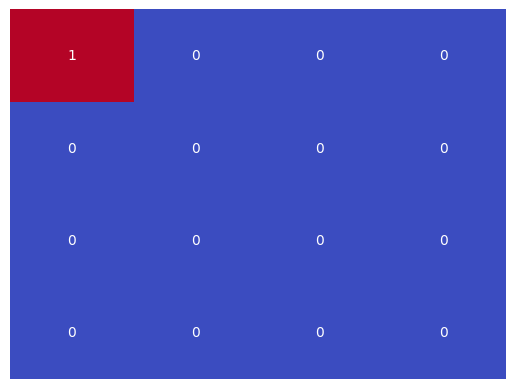

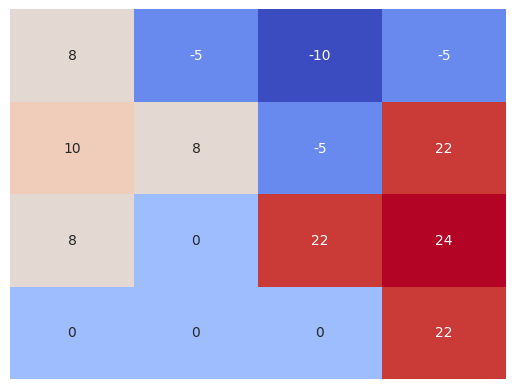

3
0
0
0
0
0
0
0
0
0
0
0
0
0
Você caiu em um poço!


In [97]:
mundo = Mundo(4)
mundo.criar_mundo()
agente = Agente1(mundo.get_matriz_mundo()) # Cria uma classe agente utlizando o mundo que foi criado
agente.apresentar() # Esse métod apresenta um mundo do mesmo tamanhao do mundo real que foi passado para classe e posicionar o agente (valor 1), na casa (0,0)
mundo.apresentar() # Apresenta o mundo criado


gameover = 0
while(gameover == 0):
  direcao, direcao_fecha = agente.pensar()
  print(direcao_fecha)
  agente.andar(direcao)
  acertou_wumpus = agente.atirar_fecha(direcao_fecha)

  if(acertou_wumpus == 1):
    mundo.criar_mundo(0)
    agente.mudar_mundo(mundo.get_matriz_mundo())

  gameover = agente.gameover()

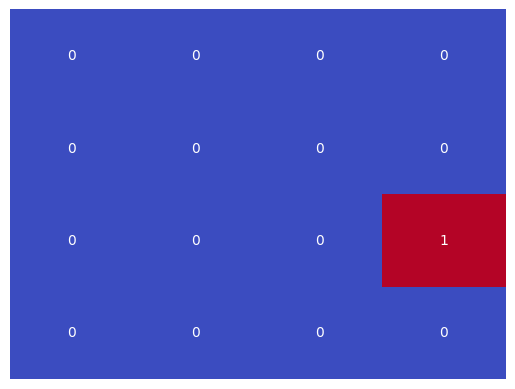

In [98]:
agente.apresentar()

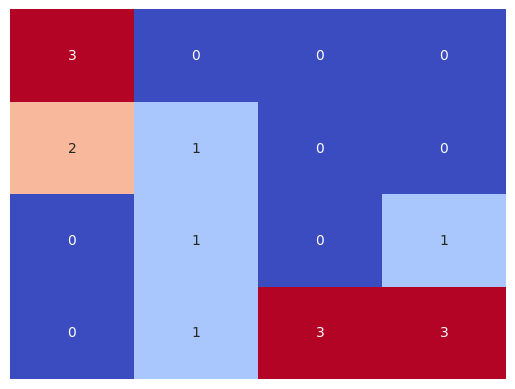

In [99]:
agente.apresentar_matriz_agente_hist()

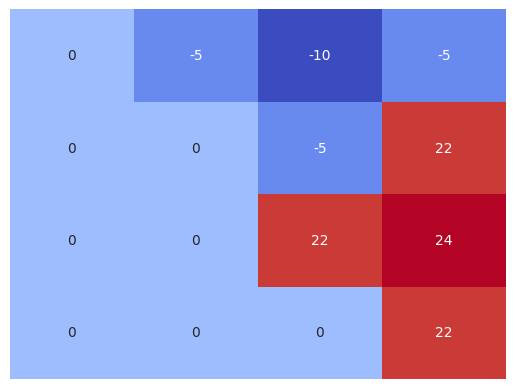

In [100]:
mundo.apresentar()